In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy import cluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('data/heart_2020_cleaned.csv')
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Dataset: "heart_2020_cleaned"
### HeartDesease - сердечные заболевания  (бинарный)
### BMI (Body Mass Index) - индекс массы тела (вещественный)
### Smoking - курение (бинарный)
### AlcoholDrinking - употребление алкоголя (бинарный)
### Stroke - инсульт (бинарный)
### PhysicalHealth - физическое здоровье (вещественный)
### DiffWalking - средняя активность прогулок (бинарный)
### Sex - пол (бинарный)
### AgeCategory - возрастная категория (категориальный)
### Race - расовая принадлежность (категориальный)
### Diabetic - диабет (бинарный)
### PhysicalActivity - физическая активность (бинарный)
### GenHealth - общее самочувствие (вещественный)
### SleepTime - время сна (целочисленный)
### Asthma - астма (бинарный)
### KidneyDisease -  заболевание почек (бинарный)
### SkinCancer - рак кожи (бинарный)

In [80]:
#метка класса - AgeCategory

In [4]:
agec = [] 
age = []
df_new = df.copy()
for i in range(df.shape[1]):
    if type(df.iloc[0, i]) == str:
        t = pd.factorize(df.iloc[0:, i])[0]
        df_new[df.iloc[0:, i].name] = t
    else:
        df_new[df.iloc[0:, i].name] = df.iloc[0:, i]

In [5]:
df_new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,0,0,0,3.0,30.0,0,0,0,0,0,0,0,5.0,0,0,0
1,0,20.34,1,0,1,0.0,0.0,0,0,1,0,1,0,0,7.0,1,0,1
2,0,26.58,0,0,0,20.0,30.0,0,1,2,0,0,0,1,8.0,0,0,1
3,0,24.21,1,0,0,0.0,0.0,0,0,3,0,1,1,2,6.0,1,0,0
4,0,23.71,1,0,0,28.0,0.0,1,0,4,0,1,0,0,8.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,0,0,0,7.0,0.0,1,1,6,5,0,1,1,6.0,0,0,1
319791,0,29.84,0,0,0,0.0,0.0,0,1,10,5,1,0,0,5.0,0,0,1
319792,0,24.24,1,0,0,0.0,0.0,0,0,8,5,1,0,2,6.0,1,0,1
319793,0,32.81,1,0,0,0.0,0.0,0,0,12,5,1,1,2,12.0,1,0,1


# Создаем датасет без меток класса

In [6]:
temp = df_new.iloc[0:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17]]
temp

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,0,0,0,3.0,30.0,0,0,0,0,0,0,5.0,0,0,0
1,0,20.34,1,0,1,0.0,0.0,0,0,0,1,0,0,7.0,1,0,1
2,0,26.58,0,0,0,20.0,30.0,0,1,0,0,0,1,8.0,0,0,1
3,0,24.21,1,0,0,0.0,0.0,0,0,0,1,1,2,6.0,1,0,0
4,0,23.71,1,0,0,28.0,0.0,1,0,0,1,0,0,8.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,0,0,0,7.0,0.0,1,1,5,0,1,1,6.0,0,0,1
319791,0,29.84,0,0,0,0.0,0.0,0,1,5,1,0,0,5.0,0,0,1
319792,0,24.24,1,0,0,0.0,0.0,0,0,5,1,0,2,6.0,1,0,1
319793,0,32.81,1,0,0,0.0,0.0,0,0,5,1,1,2,12.0,1,0,1


# 1) Выполните иерархическую агломеративную кластеризацию (scipy.cluster.hierarchy), постройте график-дендрограмму (hierarchy.dendrogram)

In [52]:
dig = 10

In [53]:
Z = linkage(temp.iloc[:dig], 'single')

In [54]:
labelList = [i for i in range(dig)]

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [50.0, 50.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [57.5, 57.5, 80.0, 80.0],
  [68.75, 68.75, 95.0, 95.0],
  [30.0, 30.0, 81.875, 81.875],
  [10.0, 10.0, 55.9375, 55.9375]],
 'dcoord': [[0.0, 20.015004371720728, 20.015004371720728, 0.0],
  [0.0, 13.904186419924036, 13.904186419924036, 0.0],
  [0.0, 3.1650592411517344, 3.1650592411517344, 0.0],
  [3.1650592411517344, 4.793422576823371, 4.793422576823371, 0.0],
  [0.0, 4.761606871634826, 4.761606871634826, 0.0],
  [4.793422576823371, 8.771322591262962, 8.771322591262962, 4.761606871634826],
  [8.771322591262962, 10.625558808834477, 10.625558808834477, 0.0],
  [13.904186419924036,
   14.297468307361273,
   14.297468307361273,
   10.625558808834477],
  [20.015004371720728,
   30.52847195651954,
   30.52847195651954,
   14.297468307361273]],
 'ivl': [2, 0, 6, 4, 8, 3, 1, 7, 5, 9],
 'leaves': [2, 0, 6, 4, 8, 3, 1, 7, 5, 9],
 'color_list': ['C1'

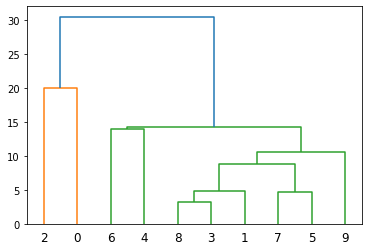

In [60]:
dendrogram(Z, labels=labelList, distance_sort='descending', show_leaf_counts=True )

# 2) На том же датасете выподните кластеризацию, используя любой другой метод кластеризации (пока с произвольными гиперпараметрами)

In [67]:
from sklearn.cluster import KMeans

In [69]:
model1 = KMeans()

In [70]:
model1.fit(temp.iloc[:1000])

KMeans()

In [72]:
pred1 = model1.labels_

In [73]:
pred1

array([2, 1, 7, 1, 4, 5, 0, 5, 5, 3, 4, 5, 5, 5, 2, 5, 5, 2, 5, 1, 1, 5,
       2, 2, 1, 7, 0, 5, 1, 3, 1, 5, 6, 1, 3, 0, 1, 1, 5, 1, 1, 5, 1, 5,
       4, 1, 5, 1, 1, 0, 5, 5, 5, 5, 0, 1, 5, 6, 5, 5, 5, 1, 1, 5, 1, 0,
       0, 1, 1, 3, 1, 0, 3, 5, 3, 1, 4, 3, 7, 5, 4, 0, 1, 5, 2, 1, 3, 1,
       5, 5, 6, 3, 1, 1, 1, 1, 2, 0, 1, 1, 1, 7, 1, 5, 1, 6, 2, 3, 5, 5,
       5, 0, 5, 3, 5, 2, 3, 5, 1, 4, 5, 6, 1, 1, 1, 3, 2, 3, 5, 1, 7, 3,
       1, 3, 5, 1, 6, 1, 2, 7, 1, 5, 7, 3, 5, 5, 5, 1, 5, 1, 5, 1, 0, 5,
       1, 6, 2, 0, 5, 1, 1, 3, 7, 5, 3, 2, 4, 1, 5, 3, 3, 3, 5, 5, 5, 1,
       3, 3, 1, 3, 1, 5, 1, 3, 1, 1, 5, 1, 7, 1, 5, 1, 0, 1, 1, 0, 1, 1,
       5, 5, 2, 1, 5, 1, 5, 1, 0, 1, 5, 0, 5, 5, 5, 2, 5, 3, 7, 0, 0, 0,
       1, 3, 1, 5, 1, 1, 1, 5, 3, 6, 1, 3, 3, 1, 1, 3, 5, 1, 5, 4, 7, 5,
       2, 3, 5, 5, 3, 0, 5, 5, 2, 5, 1, 0, 7, 1, 5, 1, 0, 5, 1, 1, 5, 4,
       5, 1, 2, 4, 3, 1, 2, 1, 2, 2, 5, 3, 5, 3, 4, 7, 5, 4, 5, 5, 4, 1,
       0, 3, 4, 0, 2, 1, 3, 7, 5, 5, 7, 7, 1, 5, 5,

In [76]:
df1 = pd.DataFrame(pred1)

In [78]:
df1.value_counts()

5    311
1    293
3    161
2     62
0     58
4     54
7     35
6     26
dtype: int64

# 3) Выполните оптимизацию гиперпараметров кластеризации (либо иерархической модели из п. 1, либо иной модели из п. 2, на ваш выбор; в случае иерархической кластеризации из п. 1 гиперпараметр — пороговое расстояние между центроидами, являющееся границей разбиения на кластеры). Оптимизацию выполните, используя одну из метрик качества кластеризации, для которых нам понадобится информация об исходных метках класса: Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI), Гомогенность, полнота, V-мера.

## Adjusted_Rand_Score 

In [79]:
from sklearn.metrics.cluster import adjusted_rand_score

In [84]:
adjusted_rand_score(df_new['AgeCategory'][:1000], pred1)

0.01882976102639657

## Adjusted_Mutual_Info_Score  

In [89]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

In [90]:
adjusted_mutual_info_score(df_new['AgeCategory'][:1000], pred1)

0.015763567806805334

## Homogeneity_Score 

In [85]:
from sklearn.metrics.cluster import homogeneity_score

In [86]:
homogeneity_score(df_new['AgeCategory'][:1000], pred1)

0.03437636631124543

## Completeness 

In [113]:
from sklearn.metrics.cluster import completeness_score

In [114]:
completeness_score(df_new['AgeCategory'][:1000], pred1)

0.04213078422977684

## V-measure

In [116]:
from sklearn.metrics.cluster import v_measure_score

In [117]:
v_measure_score(df_new['AgeCategory'][:1000], pred1)

0.037860598948494015

# 4) Используя алгоритм/модель из п. 2 выполните оптимизацию гиперпараметра количества кластеров, используя "правило локтя" (анализируем график силуэта)

## Подбор гиперпараметров 

In [92]:
from sklearn.model_selection import GridSearchCV

In [95]:
model1.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [96]:
parameters = {'n_clusters':(2, 3, 4, 5, 6, 7, 8), 'init':('k-means++', 'random'), 'algorithm':('auto', 'full', 'elkan')}
clf = GridSearchCV(model1, parameters)
clf.fit(temp.iloc[:1000], df_new['AgeCategory'][:1000])

GridSearchCV(estimator=KMeans(),
             param_grid={'algorithm': ('auto', 'full', 'elkan'),
                         'init': ('k-means++', 'random'),
                         'n_clusters': (2, 3, 4, 5, 6, 7, 8)})

In [98]:
clf.best_params_

{'algorithm': 'full', 'init': 'k-means++', 'n_clusters': 8}

## Использование модели с подобранными гиперпараметрами 

In [106]:
model2 = KMeans(n_clusters = 8, init='k-means++', algorithm='full')

In [107]:
model2.fit(temp.iloc[:1000])

KMeans(algorithm='full')

In [109]:
pred2 = model2.labels_

## Adjusted_Rand_Score 

In [110]:
adjusted_rand_score(df_new['AgeCategory'][:1000], pred2)

0.019469743566533977

## Adjusted_Mutual_Info_Score 

In [111]:
adjusted_mutual_info_score(df_new['AgeCategory'][:1000], pred2)

0.01635530056381086

## Homogeneity_Score 

In [112]:
homogeneity_score(df_new['AgeCategory'][:1000], pred2)

0.034899048311571534

## Completeness

In [115]:
completeness_score(df_new['AgeCategory'][:1000], pred2)

0.04278503343110607

## V-measure 

In [120]:
v_measure_score(df_new['AgeCategory'][:1000], pred2)

0.038441773790165626